# Project: Investigate a European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **Soccer database**, obtained from Kaggle, has data about various Soccer clubs in the different European Leagues. It has details regarding the various players in each Soccer club and has pelnty of information regarding matches conducted between the various teams. 
> This project attempts to study the various attributes assigned to each table (match info, player info etc.) in the database and perform a data analysis. This project will use python and its numpy and pandas library to structure the data.
> The questions that I personally need to find answers to satisfy my curiosity are:
1. Players with which preferred foot have greater overall player rating?
2. How does physical attributes (age and height) relate to the player overall_rating, sprint_speed, acceleration and defensive_workrate?
3. Name top 10 players with highest stamina, strength and top 50 players with overall_rating.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
% matplotlib inline

/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/RoaRMac/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/RoaRMac/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/RoaRMac/.matplotlib/matplotlibrc", line #4
  (fname, cnt))
/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/RoaRMac/.matplotlib/matplotlibrc", line #5
  (fname, cnt))


<a id='wrangling'></a>
## Data Wrangling

> Initially, data was scanned visually in the DB Browser to catch any forms of mistakes or missing data.
Data is imported and viewed in brief with basic statistics in order to understand whether data needs to be cleaned for any possible errors. 
> From the initial scanning it was understood that:
   1. Some of the data fields regarding player info in the Match data were missing.
   2. It seems player info does not have any indication of which team he belongs to.
   

### General Properties
> Each of the data table is described and displayed in brief to see any anomalies

In [2]:
df_player_attr = pd.read_csv("Player_Attributes.csv")
df_player = pd.read_csv("Player.csv")
df_team_attr = pd.read_csv("Team_Attributes.csv")
df_team = pd.read_csv("Team.csv")
df_match = pd.read_csv("Match.csv")
df_league = pd.read_csv("League.csv")
df_country = pd.read_csv("Country.csv")

#### Country_Info

In [3]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### League_info 

In [4]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


#### Team_info 

In [5]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [7]:
df_team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [8]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

> 1. A lot of data is missing in the buildUpPlayDribbling column. Be careful while using the data as it might lead to incorrect conclusion. That column wont be analysed in this work.
> 2. Some of the columns have object as the data types. They all could be converted to string type for analysis.

> Checking whether there are info about all 299 teams

In [9]:
print df_team_attr['team_api_id'].nunique() # unique counts
print df_team['team_api_id'].nunique()

288
299


> It seems data regarding all teams are not available in the team_attributes table. As the questions that ened to be reasearched don't require team name, we ignore this difference.

In [10]:
df_team_attr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


#### Match info 

In [11]:
df_match.info()
print df_match['match_api_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
25979


> Number of rows same as number of unique match data

In [12]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [13]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [14]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [15]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [17]:
print df_player['player_api_id'].nunique()
print df_player_attr['player_api_id'].nunique()

11060
11060


> 1. Players attributes seem to be present for all players.
> 2. Total player attributes' count = 183978, but most of the attributes have a count = 183142. From observation in SQ DB lite, it was seen that there were duplicate rows for same time stamp. This needs investigation.

### Data Cleaning (Replace this with more specific notes!)

> Duplicates in the player attributes table need to be removed

In [18]:
df_player_attr.drop_duplicates(subset=['player_api_id','date'], keep='first', inplace=True)
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 42 columns):
id                     183142 non-null int64
player_fifa_api_id     183142 non-null int64
player_api_id          183142 non-null int64
date                   183142 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

> Now, the total number of data rows are same most of the columns. Null values are removed.

> The questions that need to be answered requires to have team attributes data and player attributes data. Rest (country, league, team and match data) (but team attributes needed) are redundant.  
 
1. Among the player table, everything is needed.
2. Among the player attributes table, only sprint_speed, overall_rating, preferred_foot, stamina and strength are required.

In [19]:
df_player_attr = df_player_attr.loc[:, ['id', 'date', 'player_fifa_api_id', 'player_api_id', 'stamina', 'strength', 'overall_rating', 'sprint_speed', 'preferred_foot', 'acceleration' ]]
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 10 columns):
id                    183142 non-null int64
date                  183142 non-null object
player_fifa_api_id    183142 non-null int64
player_api_id         183142 non-null int64
stamina               183142 non-null float64
strength              183142 non-null float64
overall_rating        183142 non-null float64
sprint_speed          183142 non-null float64
preferred_foot        183142 non-null object
acceleration          183142 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 15.4+ MB


> Data has been filtered and cleared

In [20]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Whether preferred foot have any influence on overall player rating?

> Objective is to compare the average overall_rating for players with left and right preferred foot. Each of the player has multiple data entries correspding to different time stamps. Only the latest data for each player is extracted to perform the analysis.

In [21]:
df_player_attr1 = df_player_attr.copy(deep=True) #creating a copy for this question
df_player_attr1.sort_values(['player_api_id','date'], inplace=True)
df_player_attr1.drop_duplicates(subset=['player_api_id'], keep='last', inplace=True)
df_player_attr1.sort_values(['player_api_id'], inplace=True, ascending=True)
df_player_attr1.head()

,id,date,player_fifa_api_id,player_api_id,stamina,strength,overall_rating,sprint_speed,preferred_foot,acceleration
139843,139844,2015-01-16 00:00:00,148544,2625,77.0,56.0,61.0,63.0,right,67.0
44144,44145,2015-10-16 00:00:00,135819,2752,62.0,85.0,72.0,34.0,right,32.0
88284,88285,2016-03-17 00:00:00,110019,2768,34.0,72.0,74.0,53.0,left,51.0
72141,72142,2013-07-05 00:00:00,182861,2770,47.0,61.0,69.0,48.0,right,54.0
5121,5122,2010-08-30 00:00:00,110809,2790,56.0,67.0,67.0,72.0,left,69.0


Extracting average for left and right footed players...

/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/RoaRMac/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Number of right foot players =  8373
Number of left foot players =  2687
Average overall score of right footed players =  67.9468529798
Average overall score of left footed players =  68.0215854112


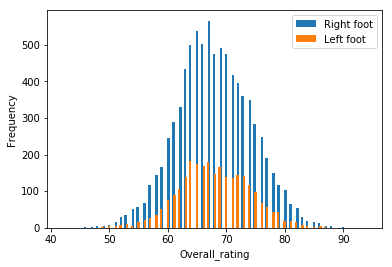

In [22]:
right_foot_df = df_player_attr1[df_player_attr.preferred_foot == 'right']
left_foot_df = df_player_attr1[df_player_attr.preferred_foot == 'left']

print 'Number of right foot players = ', right_foot_df['player_api_id'].nunique()
print 'Number of left foot players = ', left_foot_df['player_api_id'].nunique()

right_foot_mean = right_foot_df['overall_rating'].mean()
left_foot_mean = left_foot_df['overall_rating'].mean()
print 'Average overall score of right footed players = ', right_foot_mean
print 'Average overall score of left footed players = ', left_foot_mean

right_foot_df['overall_rating'].plot(kind='hist', bins=125, label='Right foot')
left_foot_df['overall_rating'].plot(kind='hist', bins=125, label='Left foot')
plt.xlabel('Overall_rating')
plt.legend()
plt.show()

> It is seen that number of players with right preferred foot are much significant (almost 4 times) than players with preferred left foot, though the average over_rating does not seem to very much.
> There seem to be no difference in over_rating of left and right footed players.

### Research Question 2 - How does physical attributes (age and height) relate to the player overall_rating, sprint_speed, acceleration and defensive_workrate?

> For this study, we will consider the latest data for each player. WE will use the df_player_attr1 dataframe for this questions

In [23]:
df_player_attr.sort_values(['date'], inplace=True, ascending=False)
df_player_attr.head()

,id,date,player_fifa_api_id,player_api_id,stamina,strength,overall_rating,sprint_speed,preferred_foot,acceleration
18845,18846,2016-07-07 00:00:00,208834,317932,63.0,66.0,66.0,64.0,right,65.0
95620,95621,2016-07-07 00:00:00,208127,307224,73.0,86.0,64.0,70.0,right,71.0
181048,181049,2016-07-07 00:00:00,221274,512726,67.0,61.0,63.0,80.0,right,80.0
1329,1330,2016-07-07 00:00:00,231638,495841,64.0,63.0,72.0,81.0,right,82.0
57229,57230,2016-07-07 00:00:00,197948,184521,74.0,92.0,73.0,55.0,right,49.0


The latest data pertains to 2016-07-07, so will calculate age on 2016-07-07 for every player. Implementing a function to calculate age and append it to the dataframe player attributes.

In [24]:
from datetime import date


def calc_age(row):
    string = row['birthday'].strip(' 00:00:00').split('-')
    date_birth = date(int(string[0]), int(string[1]), int(string[2]))
    date_today = date(2016, 7, 7)
    
    years_diff = date_today.year - date_birth.year
    months_diff = date_today.month - date_birth.month
    days_diff = date_today.day - date_birth.day
    age_in_days = (date_today - date_birth).days

    age = years_diff
    age_string = str(age) + " years"
    
    if months_diff < 0:
        age = years_diff - 1
    elif months_diff == 0:
        if days_diff < 0:
            age = years_diff - 1
        else:
            age = years_diff
    else:
        age = years_diff
    
    return age

           
df_player['age'] = df_player.apply(calc_age, axis = 1)
print df_player.head()
print '\n\nChecking if age is present in all rows\n'
print df_player.info()

print '\nNumber of data rows in player attributes dataframe = ', df_player_attr1.shape[0]



   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  age  
0  1992-02-29 00:00:00  182.88     187   24  
1  1989-12-15 00:00:00  170.18     146   26  
2  1991-05-13 00:00:00  170.18     163   25  
3  1982-05-08 00:00:00  182.88     198   34  
4  1979-11-08 00:00:00  182.88     154   36  


Checking if age is present in all rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 8 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday        

Plotting the histogram of ages to see profile of people

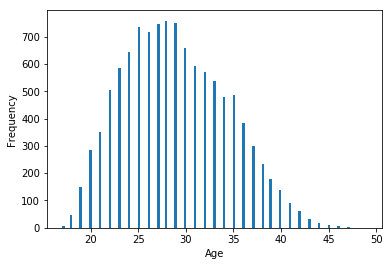

In [25]:
df_player['age'].plot(kind='hist', bins=125)
plt.xlabel('Age')
plt.show()

Number of data rows match for both dataframes. Merging both dataframes..

In [26]:
df_player_attr2 = df_player_attr1.copy(deep=True) #creating a copy for this question
df_player2 = df_player.copy(deep=True)
df_player2.drop(['id', 'player_fifa_api_id'], axis = 1, inplace=True)
df_player_attr2 = df_player_attr2.merge(df_player2, on = ['player_api_id'], how = 'right')
print df_player_attr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 15 columns):
id                    11060 non-null int64
date                  11060 non-null object
player_fifa_api_id    11060 non-null int64
player_api_id         11060 non-null int64
stamina               11060 non-null float64
strength              11060 non-null float64
overall_rating        11060 non-null float64
sprint_speed          11060 non-null float64
preferred_foot        11060 non-null object
acceleration          11060 non-null float64
player_name           11060 non-null object
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
age                   11060 non-null int64
dtypes: float64(6), int64(5), object(4)
memory usage: 1.4+ MB
None


Extracting all data to numpy arrays for plotting

In [27]:
age_array = np.asarray(df_player_attr2['age'])
height_array = np.asarray(df_player_attr2['height'])
sprint_speed_array = np.asarray(df_player_attr2['sprint_speed'])
overall_rating_array = np.asarray(df_player_attr2['overall_rating'])
acceleration_array = np.asarray(df_player_attr2['acceleration'])

Confirming whether data in each location of array corresponds to same player_api_id..

In [28]:
print df_player_attr2.head()
print 'age ', age_array[:5]
print 'height ', height_array[:5]
print 'overall_rating ', overall_rating_array[:5]
print 'sprint_speed ', sprint_speed_array[:5]
print 'acceleration ', acceleration_array[:5]

       id                 date  player_fifa_api_id  player_api_id  stamina  \
0  139844  2015-01-16 00:00:00              148544           2625     77.0   
1   44145  2015-10-16 00:00:00              135819           2752     62.0   
2   88285  2016-03-17 00:00:00              110019           2768     34.0   
3   72142  2013-07-05 00:00:00              182861           2770     47.0   
4    5122  2010-08-30 00:00:00              110809           2790     56.0   

   strength  overall_rating  sprint_speed preferred_foot  acceleration  \
0      56.0            61.0          63.0          right          67.0   
1      85.0            72.0          34.0          right          32.0   
2      72.0            74.0          53.0           left          51.0   
3      61.0            69.0          48.0          right          54.0   
4      67.0            67.0          72.0           left          69.0   

         player_name             birthday  height  weight  age  
0  Patryk Rachwal,18 

Now data is being plotted to see trends..

#### Overall_rating, overall_rating, acceleration against age

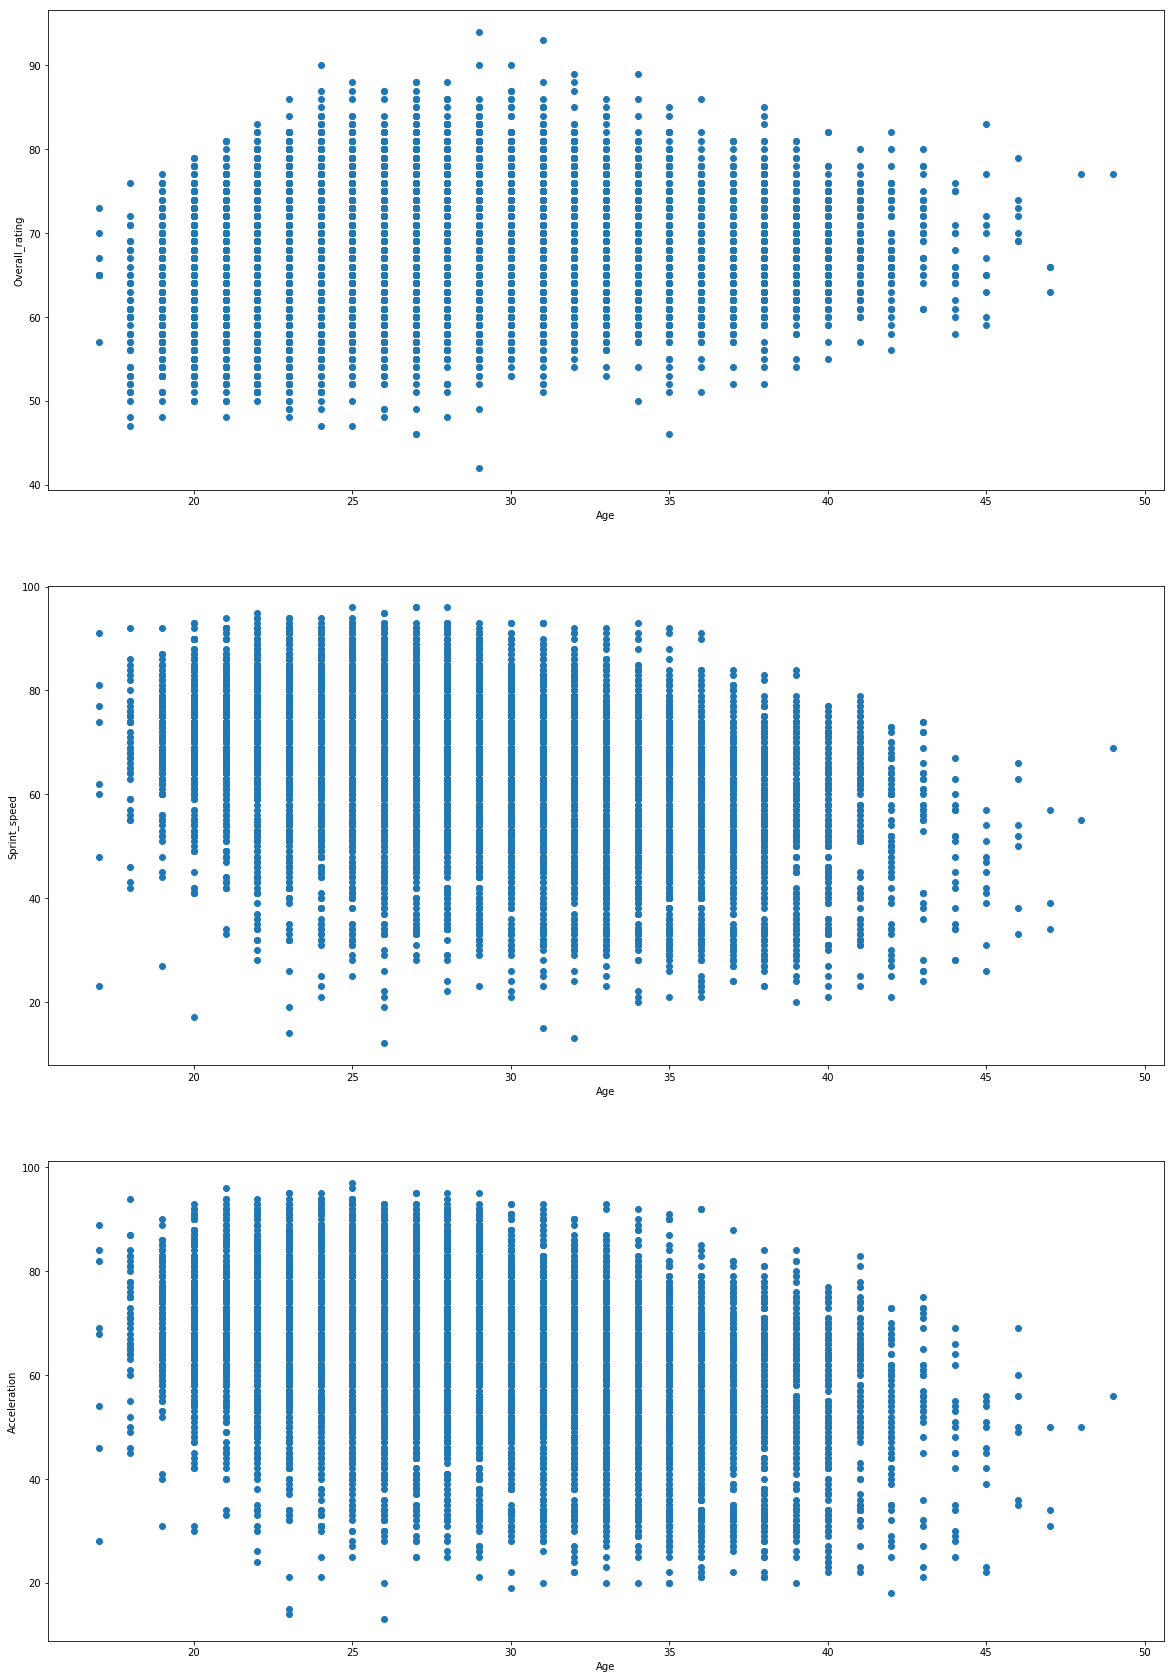

In [29]:
fig = plt.figure(figsize=(20,30))
plt.subplot(3, 1, 1)
plt.scatter(age_array, overall_rating_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Age')
plt.ylabel('Overall_rating')

plt.subplot(3,1,2)
plt.scatter(age_array, sprint_speed_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Age')
plt.ylabel('Sprint_speed')

plt.subplot(3,1,3)
plt.scatter(age_array, acceleration_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Age')
plt.ylabel('Acceleration')

plt.show()

#### Overall_rating, overall_rating, acceleration against age

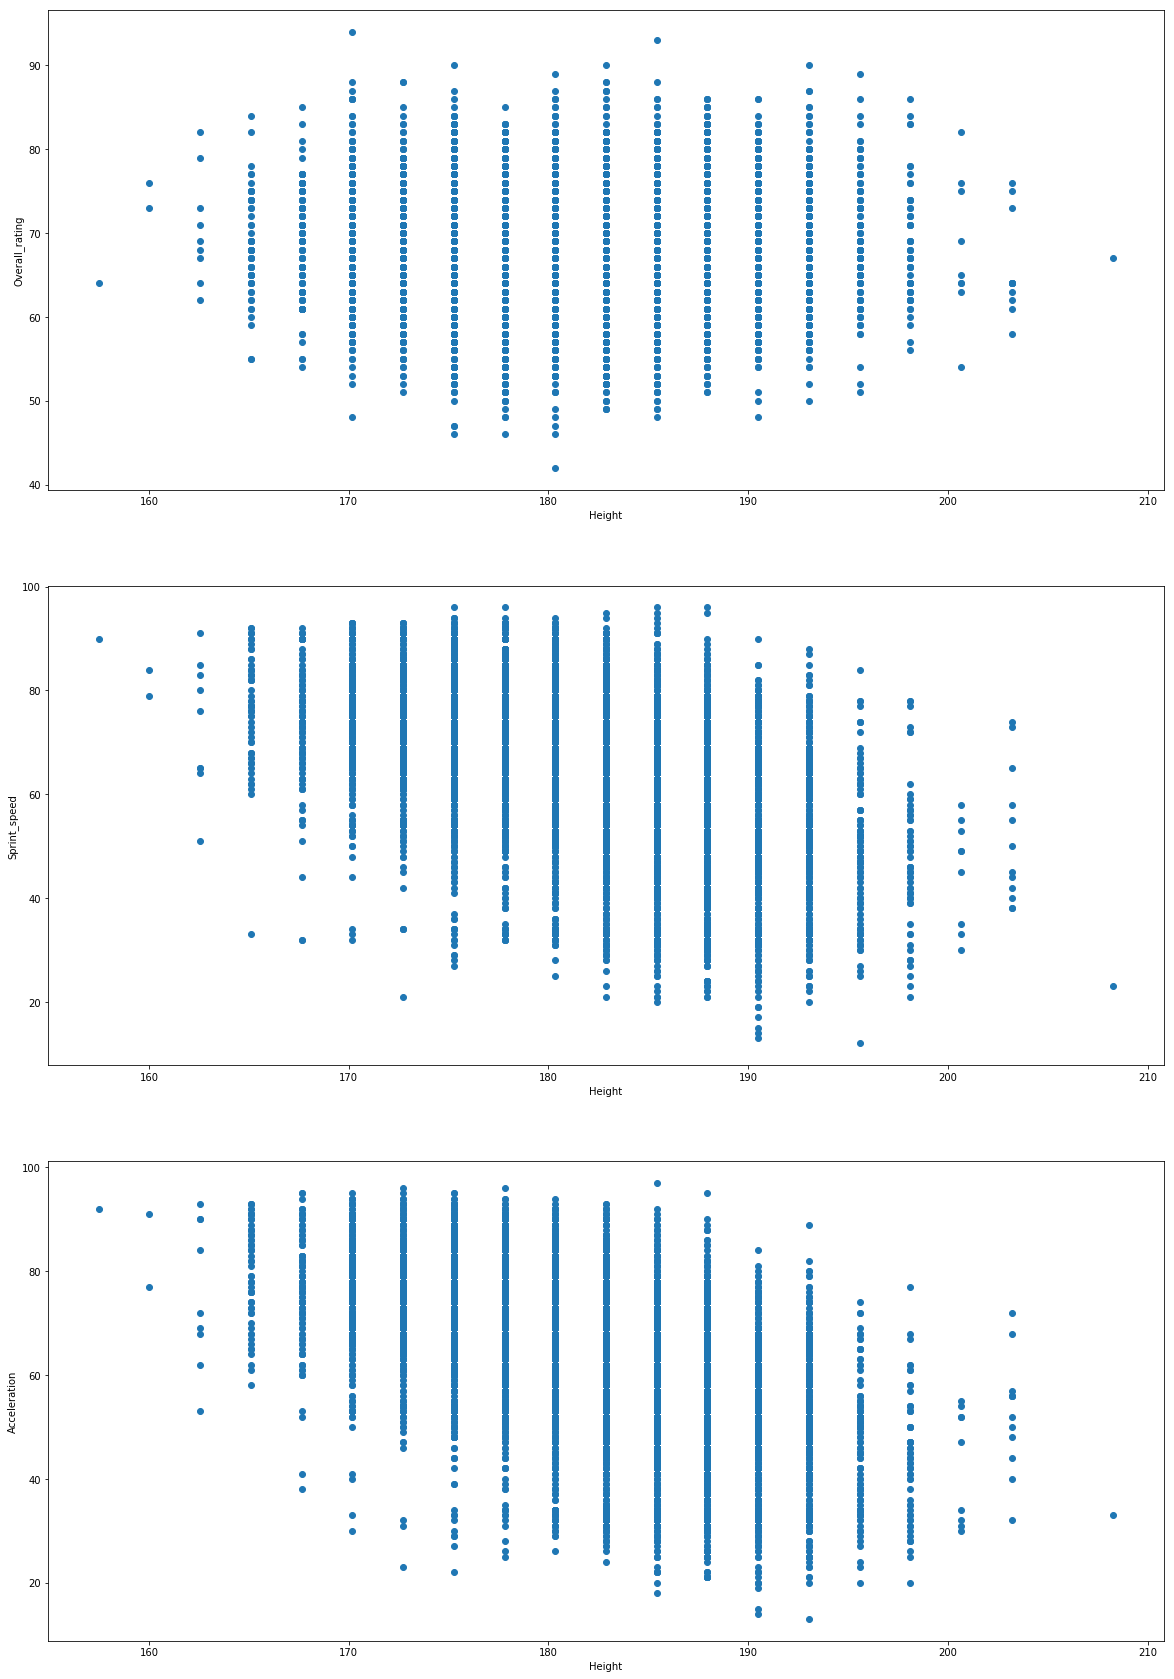

In [30]:
fig = plt.figure(figsize=(20,30))
plt.subplot(3, 1, 1)
plt.scatter(height_array, overall_rating_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Height')
plt.ylabel('Overall_rating')

plt.subplot(3,1,2)
plt.scatter(height_array, sprint_speed_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Height')
plt.ylabel('Sprint_speed')

plt.subplot(3,1,3)
plt.scatter(height_array, acceleration_array)
#plt.plot(sprint_speed_array, age_array, label = 'sprint_speed')
plt.xlabel('Height')
plt.ylabel('Acceleration')

plt.show()

####  Mean and 25th and 75th percentiles

The above plots shows soom trend. Therefore, the overall ratings are grouped by age and height and mean and 25th percentile, mean and 75th percentile are plotted.

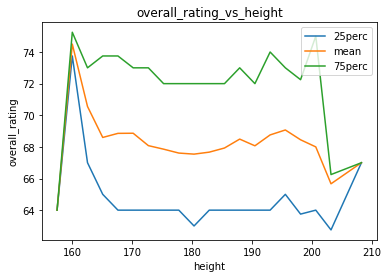

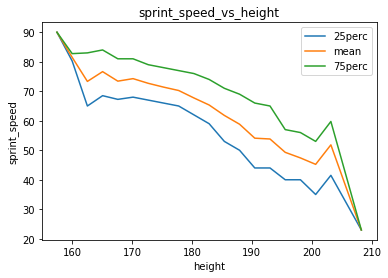

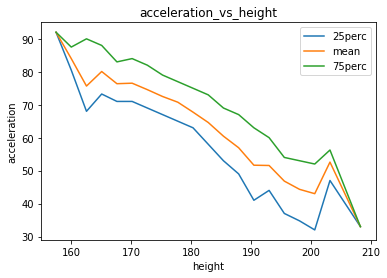

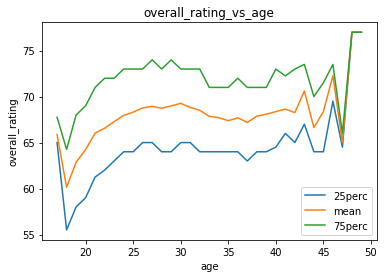

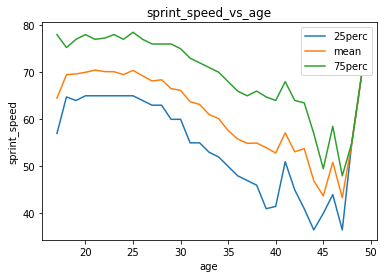

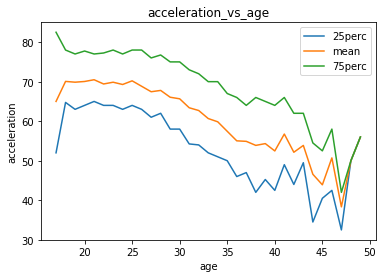

In [31]:
def groupby_andplot(groupby_var, togroup_var, df):
    grouped = df.loc[:, [groupby_var, togroup_var]].groupby(groupby_var)
    lower = grouped.agg([lambda x:np.percentile(x,25)]).rename(columns={'<lambda>':togroup_var+'_25perc'})
    mean = grouped.agg([np.mean]).rename(columns={'<lambda>':togroup_var+'_mean'})
    upper = grouped.agg([lambda x:np.percentile(x,75)]).rename(columns={'<lambda>':togroup_var+'_75perc'})
    plt.plot(lower, label='25perc')
    plt.plot(mean, label='mean')
    plt.plot(upper, label='75perc')
    plt.title(togroup_var + '_vs_' + groupby_var)
    plt.xlabel(groupby_var)
    plt.ylabel(togroup_var)
    plt.legend()
    plt.show()
    plt.close()
    return
    

    
groupby_andplot('height', 'overall_rating', df_player_attr2) 
groupby_andplot('height', 'sprint_speed', df_player_attr2) 
groupby_andplot('height', 'acceleration', df_player_attr2)
groupby_andplot('age', 'overall_rating', df_player_attr2) 
groupby_andplot('age', 'sprint_speed', df_player_attr2) 
groupby_andplot('age', 'acceleration', df_player_attr2)

#### Understanding patterns

> The understanding from pattern plots are listed below:
1. Overall_rating seems to be generally invariant with height but decreases as player height is above 200cm. Maybe football is not the game for the super tall.
2. Sprint_speed and acceleration seems to be clearly decreasing with height. This could be attributed to decrease in control and balance of body with height.
3. Overall_rating seems to increase with the initial years of professional football and seems to remain constant as they reach their peak. The players who manage to play to their later 30s and 40s seems to have increased player rating.
4. Sprint_speed and acceleration also clearly deccreases with age. This could be directly attributed to reduction of physical strength with age. But the overall rating seems to increase or stay constant which means the player learns skills and his sports intelligence increases with age and experience. 

### Research Question 3 - Name top 10 players with highest stamina, strength and top 50 players with overall_rating.

The latest data for each player will be analysed. So player_attributes dataframe from question 1 can be used.

Merging dataframes player and atrributes

In [32]:
df_player_attr3 = df_player_attr1.copy(deep=True) #creating a copy for this question
df_player3 = df_player.copy(deep=True)
df_player3.drop(['id', 'player_fifa_api_id'], axis = 1, inplace=True)
df_player_attr3.drop(['id', 'player_fifa_api_id'], axis = 1, inplace=True)
df_player_attr3 = df_player_attr3.merge(df_player3, on = ['player_api_id'], how = 'right')

Data is sliced for only data required

In [33]:
df_player_attr3 = df_player_attr3.loc[:, ['player_name', 'stamina', 'strength', 'overall_rating', 'sprint_speed', 'height', 'age']]
df_player_attr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 7 columns):
player_name       11060 non-null object
stamina           11060 non-null float64
strength          11060 non-null float64
overall_rating    11060 non-null float64
sprint_speed      11060 non-null float64
height            11060 non-null float64
age               11060 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 691.2+ KB


Data is to be sorted and highest 10 are to found

#### Top 10 players with highest stamina 

In [34]:
df_player_attr3.sort_values(['stamina'], inplace=True, ascending=False)
print df_player_attr3.iloc[0:10]

           player_name  stamina  strength  overall_rating  sprint_speed  \
8877  Christoph Kramer     95.0      69.0            78.0          67.0   
7949   Vladimir Darida     94.0      45.0            78.0          65.0   
7761             Allan     94.0      73.0            80.0          76.0   
4398  Zlatko Junuzovic     94.0      63.0            78.0          77.0   
1299    Blaise Matuidi     94.0      73.0            84.0          76.0   
3025       Lars Bender     94.0      76.0            82.0          69.0   
4139  Radja Nainggolan     94.0      78.0            83.0          78.0   
5288           Ramires     94.0      59.0            80.0          89.0   
2125  Pontus Wernbloom     93.0      83.0            79.0          64.0   
8860       Bruno Peres     93.0      69.0            80.0          93.0   

      height  age  
8877  190.50   25  
7949  170.18   25  
7761  175.26   25  
4398  172.72   28  
1299  175.26   29  
3025  185.42   27  
4139  175.26   28  
5288  180.34  

####  Top 10 players with highest strength 

In [35]:
df_player_attr3.sort_values(['strength'], inplace=True, ascending=False)
print df_player_attr3.iloc[0:10]

               player_name  stamina  strength  overall_rating  sprint_speed  \
2672         Herold Goulon     68.0      96.0            68.0          60.0   
367      Christopher Samba     55.0      96.0            77.0          30.0   
605         George Elokobi     60.0      95.0            62.0          49.0   
10689            Abdoul Ba     52.0      95.0            64.0          49.0   
1174            John Carew     57.0      94.0            73.0          69.0   
4073   Mustapha Bayal Sall     72.0      94.0            78.0          52.0   
5112         Gordan Bunoza     69.0      94.0            65.0          84.0   
1868         Oguchi Onyewu     51.0      94.0            65.0          34.0   
6390         Wilfried Bony     78.0      94.0            80.0          75.0   
9969          Cheikh Ndoye     92.0      94.0            76.0          59.0   

       height  age  
2672   195.58   28  
367    193.04   32  
605    180.34   30  
10689  200.66   22  
1174   193.04   36  
4073

#### Top 50 players with highest overall_rating 

In [36]:
df_player_attr3.sort_values(['overall_rating'], inplace=True, ascending=False)
print df_player_attr3.iloc[0:50]

                 player_name  stamina  strength  overall_rating  sprint_speed  \
2038            Lionel Messi     75.0      59.0            94.0          90.0   
1979       Cristiano Ronaldo     90.0      79.0            93.0          93.0   
400                   Neymar     79.0      45.0            90.0          90.0   
1495            Manuel Neuer     44.0      83.0            90.0          61.0   
3910             Luis Suarez     88.0      76.0            90.0          78.0   
1940            Arjen Robben     73.0      65.0            89.0          90.0   
2793      Zlatan Ibrahimovic     75.0      93.0            89.0          74.0   
5313            Thiago Silva     74.0      81.0            88.0          76.0   
3043           Sergio Aguero     74.0      73.0            88.0          86.0   
5383      Robert Lewandowski     79.0      82.0            88.0          81.0   
2021          Andres Iniesta     64.0      59.0            88.0          75.0   
5780             Eden Hazard

<a id='conclusions'></a>
## Conclusions

> Conclusions are enumerated below:
   1. Research question 1: Players with which preferred foot have greater overall player rating?
     1. It is seen that number of players with right preferred foot are much significant (almost 4 times) than players with preferred left foot, though the average over_rating does not seem to very much.
     2. There seem to be no difference in over_rating of left and right footed players. 
   2. Research question 2: How does physical attributes (age and height) relate to the player overall_rating, sprint_speed, acceleration and defensive_workrate?
     1. Overall_rating seems to be generally invariant with height but decreases as player height is above 200cm. Maybe football is not the game for the super tall.
     2. Sprint_speed and acceleration seems to be clearly decreasing with height. This could be attributed to decrease in control and balance of body with height.
     3. Overall_rating seems to increase with the initial years of professional football and seems to remain constant as they reach their peak. The players who manage to play to their later 30s and 40s seems to have increased player rating.
     4. Sprint_speed and acceleration also clearly deccreases with age. This could be directly attributed to reduction of physical strength with age. But the overall rating seems to increase or stay constant which means the player learns skills and his sports intelligence increases with age and experience. 
   3. Research question 3: Name top 10 players with highest stamina, strength and top 50 players with overall_rating.
     1. The top 10 players of required categories are plotted in ranked lists.
     
        

> Sources:
    1. github.com
    2. https://stackoverflow.com/questions/tagged/python